Calculating various statistics to investigate admixture ratios.

In [1]:
%run ../scripts/notebook_settings.py
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
meta_data_samples = pd.read_table("../data/metadata_with_x_missing.txt", sep=" ")
chrom_number = "X"
zarr_dir = "/faststorage/project/baboondiversity/data/PG_baboons_mmul_20_04_2021/callset.zarr/chr{}"

First, running D on chr2 with many possible hypothesis, to make sure that the results are the same as in fs03

In [3]:
callset = zarr.open_group(zarr_dir.format(2), mode="r")
gt = allel.GenotypeArray(callset["calldata/GT"])
g_ac = gt.take(meta_data_samples.loc[meta_data_samples.C_origin == "Gelada, Captive"].callset_index.values, axis=1).count_alleles(max_allele=1)
def d_run(a, b, c):
    a_ids = meta_data_samples.loc[meta_data_samples.C_origin == a].callset_index.values
    b_ids = meta_data_samples.loc[meta_data_samples.C_origin == b].callset_index.values
    c_ids = meta_data_samples.loc[meta_data_samples.C_origin == c].callset_index.values
    a_ac = gt.take(a_ids, axis=1).count_alleles(max_allele=1)
    b_ac = gt.take(b_ids, axis=1).count_alleles(max_allele=1)
    c_ac = gt.take(c_ids, axis=1).count_alleles(max_allele=1)
    d_stats = allel.average_patterson_d(a_ac, b_ac, c_ac, g_ac, blen=100000)
    return d_stats

In [3]:
origin_list = ["Anubis, Ethiopia", "Anubis, Tanzania", "Hamadryas, Ethiopia",
               "Cynocephalus, Central Tanzania", "Cynocephalus, Western Tanzania",
               "Ursinus, Zambia", "Kindae, Zambia"]

In [5]:
a_l = []
b_l = []
c_l = []
dbranch_l = []
z_l = []

for i in range(len(origin_list)):
    for j in range(i):
        for x in origin_list:
            d_stats = d_run(x, origin_list[i], origin_list[j])
            a_l.append(x)
            b_l.append(origin_list[i])
            c_l.append(origin_list[j])
            dbranch_l.append(d_stats[0])
            z_l.append(d_stats[2])
    print(i)
d = {"a": a_l, "b": b_l, "c": c_l, "d_stat": dbranch_l, "z-score": z_l}
df_d = pd.DataFrame(data=d)

0


/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/allel/stats/admixture.py:434: RuntimeWarning: invalid value encountered in double_scalars
  z = d_avg / se


1
2
3
4
5
6


In [23]:
d_stats = d_run("Anubis, Ethiopia", "Anubis, Tanzania", "Cynocephalus, Central Tanzania")

In [24]:
d_stats

(-0.06475375476136486,
 0.006005502976184223,
 -10.782403242185737,
 array([-9.55699812e-02, -1.31100120e-04, -1.17308915e-01, -9.98011877e-02,
        -1.06624466e-01,  3.34512537e-03, -1.44540285e-01, -5.94068766e-02,
        -7.67035446e-02, -1.12630187e-01, -1.08815703e-01, -1.29117705e-01,
        -5.61092768e-02, -7.78683716e-02, -2.31252125e-02, -1.68808708e-02,
        -1.06043237e-01, -1.03348065e-02, -9.12816433e-02, -6.01725900e-03,
        -7.20214201e-02, -4.85354293e-02, -1.27845589e-01, -9.04734775e-02,
        -1.75690147e-02, -6.92762238e-02, -2.15383849e-02, -6.20699070e-02,
        -1.04953781e-01, -5.40716905e-02, -5.46386093e-02, -7.87172468e-02,
        -3.42884935e-02, -3.09326065e-02, -2.15739872e-02,  1.78493232e-02,
        -8.51412136e-02, -2.33013887e-02, -1.25808448e-01, -9.32427555e-02,
        -1.24655501e-01, -1.56151781e-01, -2.30194356e-01, -1.54891939e-01,
        -5.73779266e-02, -3.81763906e-02, -4.37308845e-02, -3.51838192e-02,
        -6.02538874e

In [7]:
df_d.loc[df_d["z-score"] < 0].sort_values(["z-score"])

,a,b,c,d_stat,z-score
3,"Cynocephalus, Central Tanzania","Anubis, Tanzania","Anubis, Ethiopia",-0.620847,-82.991862
5,"Ursinus, Zambia","Anubis, Tanzania","Anubis, Ethiopia",-0.618753,-81.624641
6,"Kindae, Zambia","Anubis, Tanzania","Anubis, Ethiopia",-0.612681,-80.283408
4,"Cynocephalus, Western Tanzania","Anubis, Tanzania","Anubis, Ethiopia",-0.546236,-57.678917
10,"Cynocephalus, Central Tanzania","Hamadryas, Ethiopia","Anubis, Ethiopia",-0.448112,-43.260072
12,"Ursinus, Zambia","Hamadryas, Ethiopia","Anubis, Ethiopia",-0.453201,-42.587958
13,"Kindae, Zambia","Hamadryas, Ethiopia","Anubis, Ethiopia",-0.448179,-41.693126
20,"Kindae, Zambia","Hamadryas, Ethiopia","Anubis, Tanzania",-0.384539,-35.901674
19,"Ursinus, Zambia","Hamadryas, Ethiopia","Anubis, Tanzania",-0.386458,-35.898824
17,"Cynocephalus, Central Tanzania","Hamadryas, Ethiopia","Anubis, Tanzania",-0.361958,-34.610271


In [11]:
df_d.loc[(df_d["z-score"] < 20) & (df_d["z-score"] > 0)].sort_values(["z-score"])

,a,b,c,d_stat,z-score
40,"Ursinus, Zambia","Cynocephalus, Central Tanzania","Hamadryas, Ethiopia",0.003686,0.456513
73,"Cynocephalus, Central Tanzania","Ursinus, Zambia","Anubis, Ethiopia",0.006034,0.746894
27,"Kindae, Zambia","Cynocephalus, Central Tanzania","Anubis, Ethiopia",0.004773,0.830046
83,"Kindae, Zambia","Ursinus, Zambia","Anubis, Tanzania",0.006956,1.055249
76,"Kindae, Zambia","Ursinus, Zambia","Anubis, Ethiopia",0.011556,1.636643
90,"Kindae, Zambia","Ursinus, Zambia","Hamadryas, Ethiopia",0.013635,1.988826
41,"Kindae, Zambia","Cynocephalus, Central Tanzania","Hamadryas, Ethiopia",0.015598,2.667886
115,"Cynocephalus, Central Tanzania","Kindae, Zambia","Anubis, Tanzania",0.020938,3.946634
80,"Cynocephalus, Central Tanzania","Ursinus, Zambia","Anubis, Tanzania",0.028413,3.964565
68,"Ursinus, Zambia","Cynocephalus, Western Tanzania","Cynocephalus, Central Tanzania",0.057411,9.249944


In [20]:
df_d.loc[(df_d.a == "Anubis, Tanzania")]

,a,b,c,d_stat,z-score
1,"Anubis, Tanzania","Anubis, Tanzania","Anubis, Ethiopia",0.000000,NaN
8,"Anubis, Tanzania","Hamadryas, Ethiopia","Anubis, Ethiopia",0.259809,22.175532
15,"Anubis, Tanzania","Hamadryas, Ethiopia","Anubis, Tanzania",0.414274,48.325705
22,"Anubis, Tanzania","Cynocephalus, Central Tanzania","Anubis, Ethiopia",0.620847,82.991862
29,"Anubis, Tanzania","Cynocephalus, Central Tanzania","Anubis, Tanzania",0.630889,98.215979
36,"Anubis, Tanzania","Cynocephalus, Central Tanzania","Hamadryas, Ethiopia",0.438138,54.890754
43,"Anubis, Tanzania","Cynocephalus, Western Tanzania","Anubis, Ethiopia",0.546236,57.678917
50,"Anubis, Tanzania","Cynocephalus, Western Tanzania","Anubis, Tanzania",0.571945,66.619393
57,"Anubis, Tanzania","Cynocephalus, Western Tanzania","Hamadryas, Ethiopia",0.378130,42.308261
64,"Anubis, Tanzania","Cynocephalus, Western Tanzania","Cynocephalus, Central Tanzania",-0.127911,-16.650792


In [12]:
df_d

,a,b,c,d_stat,z-score
0,"Anubis, Ethiopia","Anubis, Tanzania","Anubis, Ethiopia",0.308653,47.035724
1,"Anubis, Tanzania","Anubis, Tanzania","Anubis, Ethiopia",0.000000,NaN
2,"Hamadryas, Ethiopia","Anubis, Tanzania","Anubis, Ethiopia",-0.259809,-22.175532
3,"Cynocephalus, Central Tanzania","Anubis, Tanzania","Anubis, Ethiopia",-0.620847,-82.991862
4,"Cynocephalus, Western Tanzania","Anubis, Tanzania","Anubis, Ethiopia",-0.546236,-57.678917
...,...,...,...,...,...
142,"Hamadryas, Ethiopia","Kindae, Zambia","Ursinus, Zambia",-0.224969,-22.829063
143,"Cynocephalus, Central Tanzania","Kindae, Zambia","Ursinus, Zambia",-0.003325,-0.345598
144,"Cynocephalus, Western Tanzania","Kindae, Zambia","Ursinus, Zambia",-0.024646,-3.099166
145,"Ursinus, Zambia","Kindae, Zambia","Ursinus, Zambia",0.616927,66.007375


In [4]:
def f_hat_d(aca, acb, acc, acd):
    a = aca.to_frequencies()[:, 1]
    b = acb.to_frequencies()[:, 1]
    c = acc.to_frequencies()[:, 1]
    d = acd.to_frequencies()[:, 1]
    num = (a - b) * (c - d)
    max_bc = np.maximum(b, c)
    den = (a + max_bc - (2 * a * max_bc)) * (max_bc + d - (2 * max_bc * d))

    return num, den

def average_f_hat_d(aca, acb, acc, acd, blen):
    from allel.stats.window import moving_statistic
    from allel.stats.misc import jackknife
    num, den = f_hat_d(aca, acb, acc, acd)

    # N.B., nans can occur if any of the populations have completely missing
    # genotype calls at a variant (i.e., allele number is zero). Here we
    # assume that is rare enough to be negligible.

    # calculate overall estimate
    d_avg = np.nansum(num) / np.nansum(den)

    # compute the numerator and denominator within each block
    num_bsum = moving_statistic(num, statistic=np.nansum, size=blen)
    den_bsum = moving_statistic(den, statistic=np.nansum, size=blen)

    # calculate the statistic values in each block
    vb = num_bsum / den_bsum

    # estimate standard error
    _, se, vj = jackknife((num_bsum, den_bsum),
                          statistic=lambda n, d: np.sum(n) / np.sum(d))

    # compute Z score
    z = d_avg / se

    return d_avg, se, z, vb, vj

def d_stats_trios(origin_l_l, chrom_list):
    a_l = []
    b_l = []
    c_l = []
    dbranch_l = []
    z_l = []
    chrom_l = []
    se_l = []
    for chrom in chrom_list:
        print("Working on chr", chrom)
        zarr_dir = "/faststorage/project/baboondiversity/data/PG_baboons_mmul_20_04_2021/callset.zarr/chr{}"
        callset = zarr.open_group(zarr_dir.format(chrom), mode="r")
        gt = allel.GenotypeArray(callset["calldata/GT"])
        bi_sites = gt.count_alleles().is_biallelic()
        pos = callset["variants/POS"][:].compress(bi_sites)
        pos_sorted = allel.SortedIndex(pos)
        gt = gt.compress(bi_sites)
        d_ac = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == "Gelada, Captive")].callset_index.values, axis=1).count_alleles(max_allele=1)
        for origin_trio in origin_l_l:
            a, b, c = origin_trio[0], origin_trio[1], origin_trio[2]
            a_ac = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == a) &
                                    (meta_data_samples.Sex == "F")].callset_index.values, axis=1).count_alleles(max_allele=1)
            b_ac = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == b) &
                                    (meta_data_samples.Sex == "F")].callset_index.values, axis=1).count_alleles(max_allele=1)
            c_ac = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == c) &
                                    (meta_data_samples.Sex == "F")].callset_index.values, axis=1).count_alleles(max_allele=1)
            d_stats = average_f_hat_d(a_ac, b_ac, c_ac, d_ac, blen=100000)
            a_l.append(a)
            b_l.append(b)
            c_l.append(c)
            dbranch_l.append(-d_stats[0])
            se_l.append(d_stats[1])
            z_l.append(d_stats[2])
            chrom_l.append("chr"+chrom)
    d = {"a": a_l, "b": b_l, "c": c_l, "d_stat": dbranch_l, "z-score": z_l, "SE": se_l, "chrom": chrom_l}
    df_d = pd.DataFrame(data=d)
    return df_d

In [5]:
chromosome_numbers = ['{}'.format(x) for x in range(1, 21)] + ['X']
origin_l_l = [["Anubis, Ethiopia", "Anubis, Tanzania", "Cynocephalus, Central Tanzania"],
              ["Anubis, Ethiopia", "Anubis, Tanzania", "Kindae, Zambia"],
              ["Anubis, Ethiopia", "Anubis, Tanzania", "Cynocephalus, Western Tanzania"],
              ["Anubis, Tanzania", "Anubis, Ethiopia", "Hamadryas, Ethiopia"]]

d_stats_trios = d_stats_trios(origin_l_l, chromosome_numbers)

Working on chr 1
Working on chr 2
Working on chr 3
Working on chr 4
Working on chr 5
Working on chr 6
Working on chr 7
Working on chr 8
Working on chr 9
Working on chr 10
Working on chr 11
Working on chr 12
Working on chr 13
Working on chr 14
Working on chr 15
Working on chr 16
Working on chr 17
Working on chr 18
Working on chr 19
Working on chr 20
Working on chr X


In [6]:
d_stats_trios.loc[d_stats_trios["chrom"] == "chrX", "chrtype"] = "chrX"
d_stats_trios.loc[d_stats_trios["chrom"] != "chrX", "chrtype"] = "autosomes"
d_stats_trios

,a,b,c,d_stat,z-score,SE,chrom,chrtype
0,"Anubis, Ethiopia","Anubis, Tanzania","Cynocephalus, Central Tanzania",0.016777,-7.007779,0.002394,chr1,autosomes
1,"Anubis, Ethiopia","Anubis, Tanzania","Kindae, Zambia",0.007815,-3.078271,0.002539,chr1,autosomes
2,"Anubis, Ethiopia","Anubis, Tanzania","Cynocephalus, Western Tanzania",0.015075,-5.096797,0.002958,chr1,autosomes
3,"Anubis, Tanzania","Anubis, Ethiopia","Hamadryas, Ethiopia",0.053795,-15.154506,0.003550,chr1,autosomes
4,"Anubis, Ethiopia","Anubis, Tanzania","Cynocephalus, Central Tanzania",0.023581,-9.672721,0.002438,chr2,autosomes
...,...,...,...,...,...,...,...,...
79,"Anubis, Tanzania","Anubis, Ethiopia","Hamadryas, Ethiopia",0.061629,-10.949787,0.005628,chr20,autosomes
80,"Anubis, Ethiopia","Anubis, Tanzania","Cynocephalus, Central Tanzania",0.027611,-7.809951,0.003535,chrX,chrX
81,"Anubis, Ethiopia","Anubis, Tanzania","Kindae, Zambia",0.005545,-2.048020,0.002707,chrX,chrX
82,"Anubis, Ethiopia","Anubis, Tanzania","Cynocephalus, Western Tanzania",0.020832,-6.796793,0.003065,chrX,chrX


In [20]:
d_stats_trios.loc[(d_stats_trios.c =="Hamadryas, Ethiopia")].groupby(["chrtype"]).mean()

,d_stat,z-score,SE
chrtype,,,
autosomes,0.054693,-12.310400,0.004589
chrX,0.076957,-13.390062,0.005747


In [21]:
d_stats_trios.loc[(d_stats_trios.c =="Cynocephalus, Central Tanzania")].groupby(["chrtype"]).mean()

,d_stat,z-score,SE
chrtype,,,
autosomes,0.025188,-7.697675,0.005171
chrX,0.027611,-7.809951,0.003535


[Text(0.5, 1.0, 'Hamadryas to Ethiopian Anubis'), Text(0.5, 0, 'f_hat')]

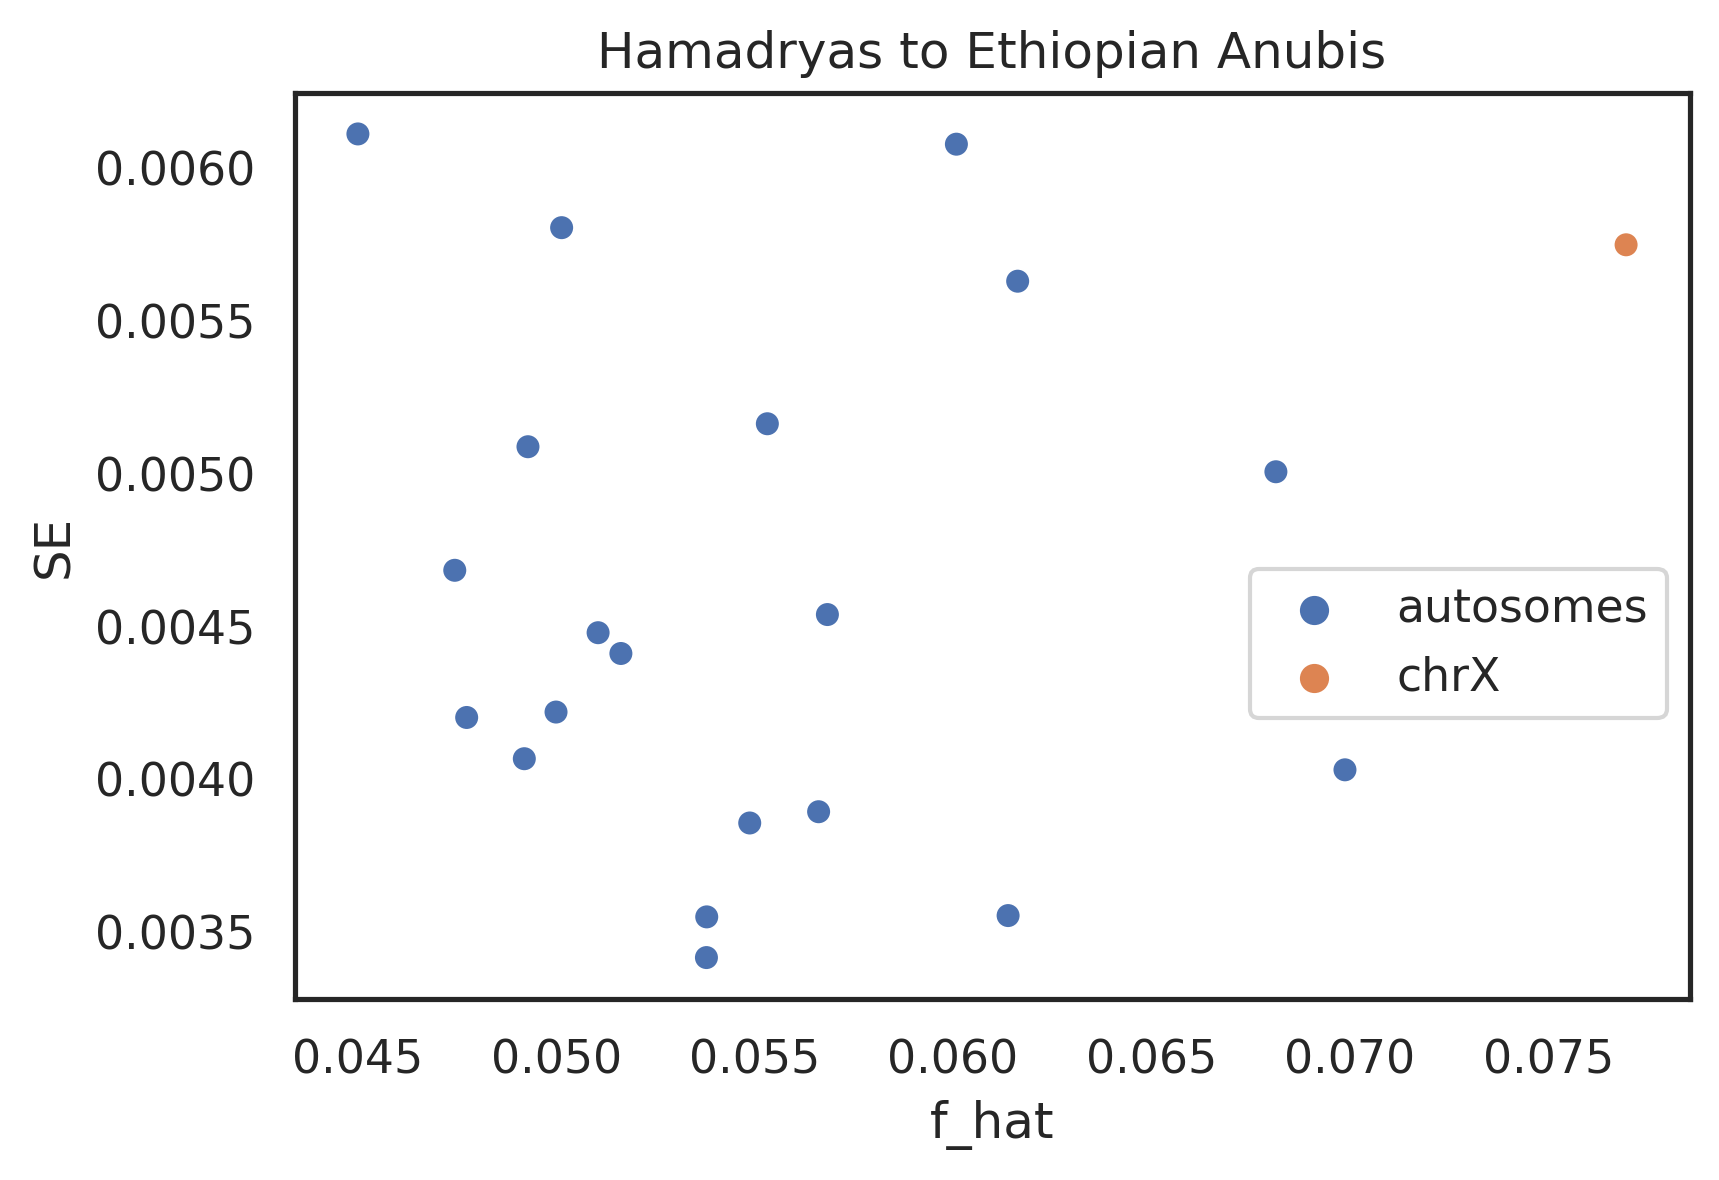

In [16]:
g = sns.scatterplot(data=d_stats_trios.loc[(d_stats_trios.c =="Hamadryas, Ethiopia")], x="d_stat", y="SE", hue="chrtype")
fig = g.get_figure()
g.legend(bbox_to_anchor=(1., 0.5, 0., 0))
g.set(title="Hamadryas to Ethiopian Anubis", xlabel="f_hat")

In [37]:
print(d_stats_trios.loc[(d_stats_trios.c =="Hamadryas, Ethiopia") & (d_stats_trios.chrom != "chrX")].mean(),
d_stats_trios.loc[(d_stats_trios.c =="Hamadryas, Ethiopia") & (d_stats_trios.chrom == "chrX")].mean())

d_stat      0.110163
z-score   -12.670509
SE          0.009106
dtype: float64 d_stat      0.196033
z-score   -13.492987
SE          0.014529
dtype: float64


In [24]:
for trio in origin_l_l:
    pure_df = d_stats_trios.loc[(d_stats_trios.b == trio[1]) & (d_stats_trios.c == trio[2])]
    print(trio)
    print(pure_df.loc[pure_df.chrtype == "chrX"].d_stat.mean(), pure_df.loc[pure_df.chrtype == "chrX"]["z-score"].mean())
    print(pure_df.loc[pure_df.chrtype != "chrX"].d_stat.mean(), pure_df.loc[pure_df.chrtype != "chrX"]["z-score"].mean())

['Anubis, Ethiopia', 'Anubis, Tanzania', 'Cynocephalus, Central Tanzania']
-0.12142449566604076 -8.116822079628681
-0.0628971429158266 -7.483482983919498
['Anubis, Ethiopia', 'Anubis, Tanzania', 'Kindae, Zambia']
-0.027140451259053327 -2.0198174034533376
-0.030593494601122706 -3.600153806586186
['Anubis, Ethiopia', 'Anubis, Tanzania', 'Cynocephalus, Western Tanzania']
-0.08134593479907458 -7.189982294841478
-0.04421569094864802 -5.650043468331242
['Anubis, Tanzania', 'Anubis, Ethiopia', 'Hamadryas, Ethiopia']
-0.19603303290652588 -13.49298733370062
-0.11016292680504902 -12.670508712957846
['Anubis, Ethiopia', 'Anubis, Tanzania', 'Hamadryas, Ethiopia']
0.19603303290652588 13.49298733370062
0.11016292680504902 12.670508712957846


These results are quite close to the papio ref results. I will use the At/Ae/H and Ae/At/Cct as the two admixture cases, so I ignore the kindae and western tanzania cynocephalus.
I will calculate all statistics using the windowed functions in scikit-allel

#Anubis, Tanzania - Anubis, Ethiopia - Hamadryas

Various functions to use in calculate the stats

In [4]:
import bisect
def f_hat_d(aca, acb, acc, acd):
    a = aca.to_frequencies()[:, 1]
    b = acb.to_frequencies()[:, 1]
    c = acc.to_frequencies()[:, 1]
    d = acd.to_frequencies()[:, 1]
    num = (a - b) * (c - d)
    max_bc = np.maximum(b, c)
    den = (a + max_bc - (2 * a * max_bc)) * (max_bc + d - (2 * max_bc * d))

    return num, den

def locate_range_empty_allowed(self, start=None, stop=None):
        if start is None:
            start_index = 0
        else:
            start_index = bisect.bisect_left(self, start)
        if stop is None:
            stop_index = len(self)
        else:
            stop_index = bisect.bisect_right(self, stop)

        loc = slice(start_index, stop_index)
        return loc

In [9]:
bi_sites = gt.count_alleles().is_biallelic()
pos = callset["variants/POS"][:].compress(bi_sites)
gt = gt.compress(bi_sites)
g_ac = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == "Gelada, Captive")].callset_index.values, axis=1).count_alleles(max_allele=1)
at_ac = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == "Anubis, Tanzania") &
                                    (meta_data_samples.Sex == "F")].callset_index.values, axis=1).count_alleles(max_allele=1)
ae_ac = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == "Anubis, Ethiopia") &
                                    (meta_data_samples.Sex == "F")].callset_index.values, axis=1).count_alleles(max_allele=1)
h_ac = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == "Hamadryas, Ethiopia") &
                                    (meta_data_samples.Sex == "F")].callset_index.values, axis=1).count_alleles(max_allele=1)

Small test of f_hat and D

In [10]:
f_hat_est = f_hat_d(at_ac, ae_ac, h_ac, g_ac)
d_est = allel.patterson_d(at_ac, ae_ac, h_ac, g_ac)
print(np.nansum(f_hat_est[0])/np.nansum(f_hat_est[1]), np.nansum(d_est[0])/np.nansum(d_est[1]))

-0.05378746771477838 -0.11424912642313101


Generating 3 estimates of admixture: Pattersons D, f_hat and shared_percentage.

In [5]:
def windowed_stats_chrom(a, b, c, d, pos, s):
    pos_sorted = allel.SortedIndex(pos)
    start_l = []
    n_s_l = []
    d_l = []
    f_hat_l = []
    a_count = []
    c_count = []
    d_est = allel.patterson_d(a, b, c, d) #Calculating Pattersons D for all sites
    f_hat = f_hat_d(a, b, c, d) #Calculating f_hat for all sites
    for i in range(0, pos[-1], s):
        pos_range = locate_range_empty_allowed(pos_sorted, i, i+s-1)
        pos_window = pos_sorted[pos_range]
        start_l.append(i)
        n_s_l.append(len(pos_window))
        if len(pos_window) > 10:
            d_l.append(np.nansum(d_est[0][pos_range])/np.nansum(d_est[1][pos_range]))
            f_hat_l.append(np.nansum(f_hat[0][pos_range])/np.nansum(f_hat[1][pos_range]))
            a_sub = (a[pos_range]).to_frequencies()[:, 1]
            b_sub = (b[pos_range]).to_frequencies()[:, 1]
            c_sub = (c[pos_range]).to_frequencies()[:, 1]
            case_a = (a_sub >= 0.2) & (c_sub == 0)
            case_c = (a_sub == 0.0) & (c_sub >= 0.2)
            a_count.append(np.nansum(b_sub.compress(case_a)))
            c_count.append(np.nansum(b_sub.compress(case_c)))
        else:
            d_l.append(np.nan)
            f_hat_l.append(np.nan)
            a_count.append(0)
            c_count.append(0)
    df = pd.DataFrame(data={"start": start_l, "sites": n_s_l, "D": d_l, "f_hat": f_hat_l,
                            "a_shared": a_count, "c_shared": c_count})
    df["shared_sum_freq"] = (df["c_shared"]+df["a_shared"])
    df["c_percentage"] = df["c_shared"]/df["shared_sum_freq"]
    return df

#chrom_df = windowed_stats_chrom(at_ac, ae_ac, h_ac, g_ac, pos, 1000000)

F_hat is more conservative than D. It always outputs an equal or less extreme statistic (this is all calculated with a sign inversion)

Calculating LD the recipient in the windows - higher LD in admixed windows can dispel theories about ILS or noise

In [13]:
ae_gt = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == "Anubis, Ethiopia") &
                                    (meta_data_samples.Sex == "F")].callset_index.values, axis=1)

In [14]:
ae_n_alt = ae_gt.to_n_alt()

In [15]:
bool_list = []
for i in range(ae_n_alt.shape[0]):
    if np.all(ae_n_alt[i] == ae_n_alt[i][0]):
        bool_list.append(False)
    else:
        bool_list.append(True)

In [16]:
informative_sites = ae_n_alt.compress(bool_list, axis=0)
informative_sites_pos = pos.compress(bool_list, axis=0)

In [17]:
nnz, windows, counts = allel.windowed_r_squared(informative_sites_pos, informative_sites, start=0, size=100000, percentile=70)

/home/eriks/miniconda3/envs/baboondiversity/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

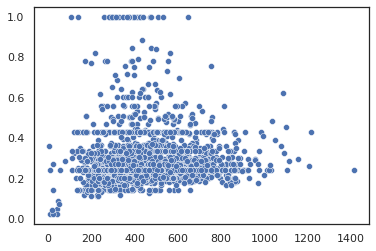

In [18]:
sns.scatterplot(counts, nnz)

In [6]:
def windowed_ld(gt, pos, size):
    n_alt = gt.to_n_alt()
    bool_list = []
    for i in range(n_alt.shape[0]):
        if np.all(n_alt[i] == n_alt[i][0]):
            bool_list.append(False)
        else:
            bool_list.append(True)
    informative_sites = n_alt.compress(bool_list, axis=0)
    informative_sites_pos = pos.compress(bool_list, axis=0)
    nnz, windows, counts = allel.windowed_r_squared(informative_sites_pos, informative_sites, start=0, size=size, percentile=70)
    return pd.DataFrame(data={"LD": nnz, "LD_counts": counts})
#windowed_ld(ae_gt, pos, 100000)

In [7]:
def generate_input(a_name, b_name, c_name, d_name, chrom_number):
    zarr_dir = "/faststorage/project/baboondiversity/data/PG_baboons_mmul_20_04_2021/callset.zarr/chr{}"
    callset = zarr.open_group(zarr_dir.format(chrom_number), mode="r")
    gt = allel.GenotypeArray(callset["calldata/GT"])
    bi_sites = gt.count_alleles().is_biallelic()
    pos = callset["variants/POS"][:].compress(bi_sites)
    gt = gt.compress(bi_sites)
    a_ac = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == a_name) &
                                    (meta_data_samples.Sex == "F")].callset_index.values, axis=1).count_alleles(max_allele=1)
    b_ac = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == b_name) &
                                    (meta_data_samples.Sex == "F")].callset_index.values, axis=1).count_alleles(max_allele=1)
    c_ac = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == c_name) &
                                    (meta_data_samples.Sex == "F")].callset_index.values, axis=1).count_alleles(max_allele=1)
    d_ac = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == d_name)].callset_index.values, axis=1).count_alleles(max_allele=1)
    b_gt = gt.take(meta_data_samples.loc[(meta_data_samples.C_origin == b_name) &
                                    (meta_data_samples.Sex == "F")].callset_index.values, axis=1)
    return a_ac, b_ac, c_ac, d_ac, b_gt, pos

Setting it all up to run for multiple chromosomes or multiple input combinations.
Starting input: Names of the 4 C_origin to use, as well as chromosome number and size of windows.
Overview of output generated by generate_input:
Filter for biallelic sites, generate pos, allele counts for each node, gt for recipient species.
As well, specify window size and chromosomes to investigate

In [8]:
#Case1: Flow from hamadryas to anubis in ethiopia
a_name, b_name, c_name, d_name = "Anubis, Tanzania", "Anubis, Ethiopia", "Hamadryas, Ethiopia", "Gelada, Captive"
chromosome_numbers = ['{}'.format(x) for x in range(1, 21)] + ['X']
size = 1000000

In [9]:
df_list = []
for chrom_number in chromosome_numbers:
    a_ac, b_ac, c_ac, d_ac, b_gt, pos = generate_input(a_name, b_name, c_name, d_name, chrom_number)
    window_df = windowed_stats_chrom(a_ac, b_ac, c_ac, d_ac, pos, size)
    #ld_df = windowed_ld(b_gt, pos, size)
    chrom_df = window_df #Tempoary change to not run LD analysis, as it is slow
    #chrom_df = pd.concat([window_df, ld_df], axis=1)
    chrom_df.insert(loc=2, column="chrom", value="chr"+chrom_number)
    df_list.append(chrom_df)
    print(chrom_number)
aah_df = pd.concat(df_list)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
X


In [10]:
#Case2, gene flow from cynocephalus in central tanzania to anubis
a_name, b_name, c_name, d_name = "Anubis, Ethiopia", "Anubis, Tanzania", "Cynocephalus, Central Tanzania", "Gelada, Captive"
chromosome_numbers = ['{}'.format(x) for x in range(1, 21)] + ['X']
size = 1000000

In [11]:
df_list = []
for chrom_number in chromosome_numbers:
    a_ac, b_ac, c_ac, d_ac, b_gt, pos = generate_input(a_name, b_name, c_name, d_name, chrom_number)
    window_df = windowed_stats_chrom(a_ac, b_ac, c_ac, d_ac, pos, size)
    #ld_df = windowed_ld(b_gt, pos, size)
    chrom_df = window_df #Tempoary change to not run LD analysis, as it is slow
    #chrom_df = pd.concat([window_df, ld_df], axis=1)
    chrom_df.insert(loc=2, column="chrom", value="chr"+chrom_number)
    df_list.append(chrom_df)
    print(chrom_number)
aac_df = pd.concat(df_list)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
X


Look at the two dataframes

In [ ]:
aah_df.dropna(inplace=True)
aah_df.loc[aah_df["chrom"] == "chrX", "chrtype"] = "chrX"
aah_df.loc[aah_df["chrom"] != "chrX", "chrtype"] = "autosome"

In [ ]:
aah_df

In [ ]:
sns.histplot(data=aah_df, x="f_hat", hue="chrtype", common_norm=False, stat="probability", multiple="dodge", bins=30)

In [ ]:
sns.scatterplot(data=aah_df, x="sites", y="D", hue="chrtype")

In [ ]:
sns.scatterplot(data=aah_df, x="f_hat", y="D", hue="chrtype")

In [ ]:
aah_df.loc[aah_df.f_hat < -0.25]

In [ ]:
aah_df.loc[aah_df.chrom == "chrX"].f_hat.mean()

In [ ]:
aah_df.loc[aah_df.chrom != "chrX"].f_hat.mean()

In [ ]:
aac_df.dropna(inplace=True)
aac_df.loc[aac_df["chrom"] == "chrX", "chrtype"] = "chrX"
aac_df.loc[aac_df["chrom"] != "chrX", "chrtype"] = "autosome"

In [ ]:
sns.histplot(data=aac_df.loc[(aac_df.f_hat > -0.3) & ], x="f_hat", hue="chrtype", common_norm=False, stat="probability", multiple="dodge", bins=30)

In [ ]:
sns.scatterplot(data=aac_df, x="f_hat", y="D", hue="chrtype")

In [ ]:
aac_df.loc[aac_df.f_hat < -0.13]

In [ ]:
aac_df.loc[aac_df.chrom == "chrX"].f_hat.mean()

In [ ]:
aac_df.loc[aac_df.chrom != "chrX"].f_hat.mean()

In [ ]:
aac_df.loc[(aac_df.chrom == "chrX") & (aac_df.LD > 0.5) & (aac_df.f_hat < -0.05)]

In [ ]:
np.corrcoef(aac_df.loc[aac_df.chrom != "chrX"].f_hat, aac_df.loc[aac_df.chrom != "chrX"].LD)

Generating D with jackknife for all chromosomes

In [ ]:
a_name, b_name, c_name, d_name = "Anubis, Tanzania", "Anubis, Ethiopia", "Hamadryas, Ethiopia", "Gelada, Captive"
chromosome_numbers = ['{}'.format(x) for x in range(1, 21)] + ['X']

In [ ]:
c_list = []
d_list = []
z_list = []
for chrom_number in chromosome_numbers:
    a_ac, b_ac, c_ac, d_ac, b_gt, pos = generate_input(a_name, b_name, c_name, d_name, chrom_number)
    d, se, z, vb, vj = allel.average_patterson_d(a_ac, b_ac, c_ac, d_ac, 10000)
    c_list.append("chr"+chrom_number), d_list.append(d), z_list.append(z)
    print(chrom_number)
aah_jack_df = pd.DataFrame(data={"chrom": c_list, "D": d_list, "Z": z_list})

In [ ]:
aah_jack_df.loc[aah_jack_df["chrom"] == "chrX", "chrtype"] = "chrX"
aah_jack_df.loc[aah_jack_df["chrom"] != "chrX", "chrtype"] = "autosome"

In [ ]:
g = sns.scatterplot(data=aah_jack_df, x="D", y="Z", hue="chrtype")
g.set_title("Anubis-Hamadryas case")

In [ ]:
a_name, b_name, c_name, d_name = "Anubis, Ethiopia", "Anubis, Tanzania", "Cynocephalus, Central Tanzania", "Gelada, Captive"
chromosome_numbers = ['{}'.format(x) for x in range(1, 21)] + ['X']

In [ ]:
c_list = []
d_list = []
z_list = []
for chrom_number in chromosome_numbers:
    a_ac, b_ac, c_ac, d_ac, b_gt, pos = generate_input(a_name, b_name, c_name, d_name, chrom_number)
    d, se, z, vb, vj = allel.average_patterson_d(a_ac, b_ac, c_ac, d_ac, 10000)
    c_list.append("chr"+chrom_number), d_list.append(d), z_list.append(z)
    print(chrom_number)
aac_jack_df = pd.DataFrame(data={"chrom": c_list, "D": d_list, "Z": z_list})

In [ ]:
aac_jack_df.loc[aac_jack_df["chrom"] == "chrX", "chrtype"] = "chrX"
aac_jack_df.loc[aac_jack_df["chrom"] != "chrX", "chrtype"] = "autosome"

In [ ]:
g = sns.scatterplot(data=aac_jack_df, x="D", y="Z", hue="chrtype")
g.set_title("Anubis-Cynocephalus case")

In [ ]:
aac_jack_df